In [1]:
pwd

'C:\\Users\\ryanc\\Desktop\\NU (4th) Senior classes\\Stat 390 - Data Science Project\\Code Work'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import sklearn as sk
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn import impute
from sklearn import preprocessing
from sklearn.impute import KNNImputer
import itertools
import time
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = pd.read_csv("owid-covid-data.csv")

In [4]:
# Getting list of all variables in dataset
list(df)

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

In [6]:
# Getting a list of unique countries
unique_countries = df['location'].unique().tolist()
unique_countries

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'European Union',


In [21]:
# Getting a list of unique continents
unique_continents = df['continent'].unique().tolist()
unique_continents

['Asia', nan, 'Europe', 'Africa', 'North America', 'South America', 'Oceania']

# Seasonal Decomposition

In [22]:
# Looking at the three North American countries: Canada, United States & Mexico

df_Canada = df[df['location'] == 'Canada']
df_US = df[df['location'] == 'United States']
df_Mexico = df[df['location'] == 'Mexico']

# General information for more broad information: Africa, Asia, Europe, Oceania, North America, South America & World
df_Africa = df[df['location'] == 'Africa']
df_Asia = df[df['location'] == 'Asia']
df_Europe = df[df['location'] == 'Europe']
df_Oceania = df[df['location'] == 'Oceania']
df_NorthAmerica = df[df['location'] == 'North America']
df_SouthAmerica = df[df['location'] == 'South America']
df_World = df[df['location'] == 'World']

In [48]:
# Decomposing the data for Total Cases for the United States using additive model. Maybe want to explore setting this to multiplicative model later.

US_decompose_add = seasonal_decompose(x=df_US['total_cases'], model='additive', freq=24) # Set fre=24 for a biweekly evaluation period
US_estimated_trend_add = US_decompose_add.trend
US_estimated_seasonal_add = US_decompose_add.seasonal
US_estimated_residual_add = US_decompose_add.resid

US_decompose_mult = seasonal_decompose(x=df_US['total_cases'], model='multiplicative', freq=24) # Set fre=24 for a biweeklyh evaluation period
US_estimated_trend_mult = US_decompose_mult.trend
US_estimated_seasonal_mult = US_decompose_mult.seasonal
US_estimated_residual_mult = US_decompose_mult.resid

<ipython-input-48-34f766be58e5>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  US_decompose_add = seasonal_decompose(x=df_US['total_cases'], model='additive', freq=24) # Set fre=24 for a biweekly period evaluation
<ipython-input-48-34f766be58e5>:8: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  US_decompose_mult = seasonal_decompose(x=df_US['total_cases'], model='multiplicative', freq=24) # Set fre=24 for a biweeklyh period evaluation


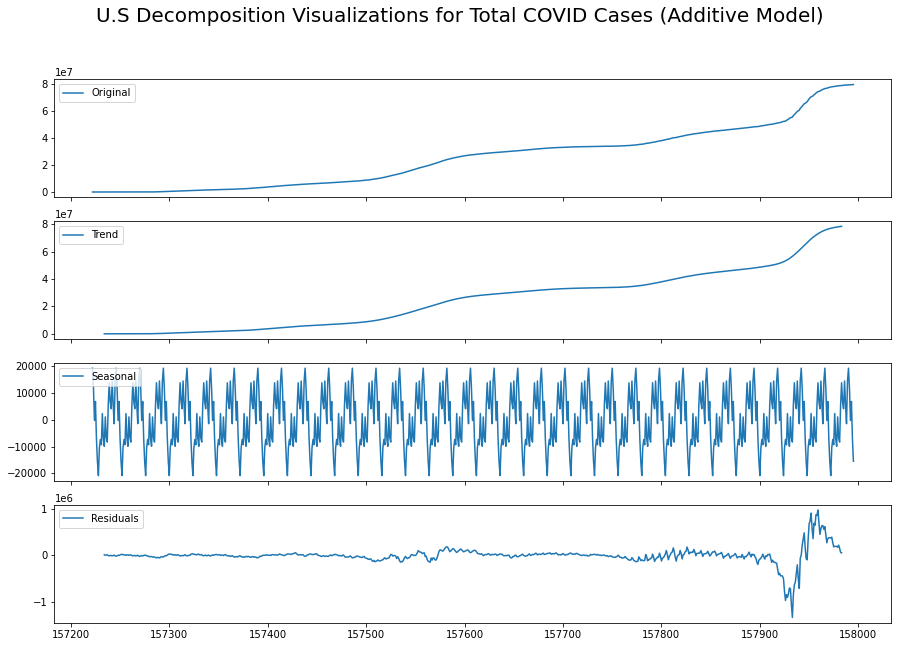

In [49]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)
fig.suptitle('U.S Decomposition Visualizations for Total COVID Cases (Additive Model)', size = 20)

axes[0].plot(df_US['total_cases'], label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(US_estimated_trend_add, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(US_estimated_seasonal_add, label='Seasonal')
axes[2].legend(loc='upper left');

axes[3].plot(US_estimated_residual_add, label='Residuals')
axes[3].legend(loc='upper left');

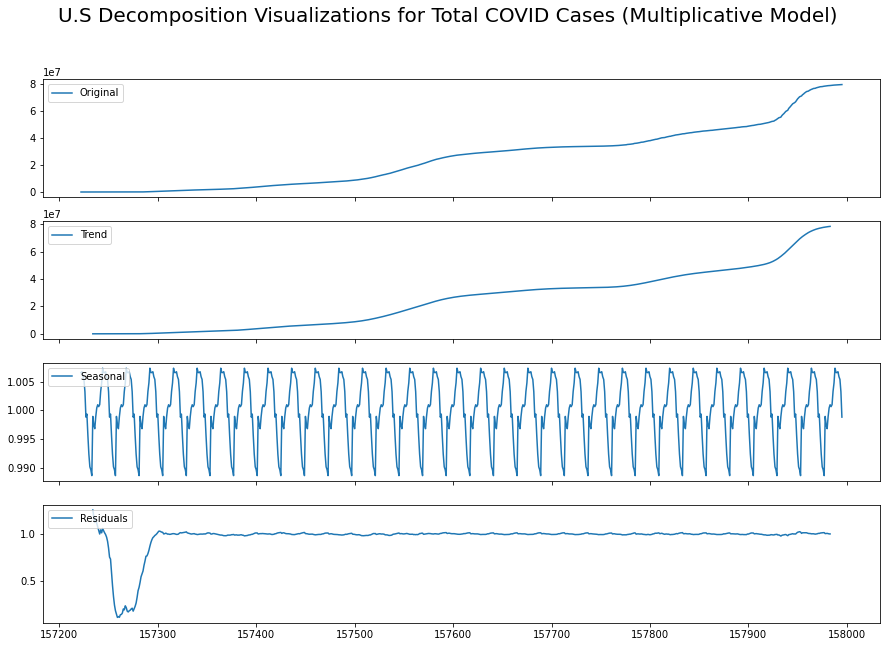

In [50]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)
fig.suptitle('U.S Decomposition Visualizations for Total COVID Cases (Multiplicative Model)', size = 20)

axes[0].plot(df_US['total_cases'], label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(US_estimated_trend_mult, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(US_estimated_seasonal_mult, label='Seasonal')
axes[2].legend(loc='upper left');

axes[3].plot(US_estimated_residual_mult, label='Residuals')
axes[3].legend(loc='upper left');

In [36]:
# Decomposing the data for the Canada, Mexico, and the 7 broader location

Canada_decompose_add = seasonal_decompose(x=df_Canada['total_cases'], model='additive', freq=24)
Canada_estimated_trend_add = Canada_decompose_add.trend
Canada_estimated_seasonal_add = Canada_decompose_add.seasonal
Canada_estimated_residual_add = Canada_decompose_add.resid


<ipython-input-36-1b6537ffeeaa>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  Canada_decompose_add = seasonal_decompose(x=df_Canada['total_cases'], model='additive', freq=24)


In [38]:
# Decomposing the data for Total Cases for the United States using additive model. Maybe want to explore setting this to multiplicative model later.

US_decompose_add = seasonal_decompose(x=df_US['total_deaths'], model='additive', freq=24) # Set fre=24 for a 24-month period evaluation
US_estimated_trend_add = US_decompose_add.trend
US_estimated_seasonal_add = US_decompose_add.seasonal
US_estimated_residual_add = US_decompose_add.resid

US_decompose_mult = seasonal_decompose(x=df_US['total_deaths'], model='multiplicative', freq=24) # Set fre=24 for a 24-month period evaluation
US_estimated_trend_mult = US_decompose_mult.trend
US_estimated_seasonal_mult = US_decompose_mult.seasonal
US_estimated_residual_mult = US_decompose_mult.resid

<ipython-input-38-454513aee0ae>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  US_decompose_add = seasonal_decompose(x=df_US['total_deaths'], model='additive', freq=24) # Set fre=24 for a 24-month period evaluation


ValueError: This function does not handle missing values

# (Elementary/Preliminary) Feature Engineering

In [59]:
# Creating three new variables

vaccination_rate = df['people_vaccinated'].div(df.population, axis=0)

full_vaccination_rate = df['people_fully_vaccinated'].div(df.population, axis=0)

vaccination_positivity_ratio = vaccination_rate.div(df.population, axis=0)

In [61]:
df_NF = df.copy()
df_NF['vaccination_rate'] = vaccination_rate
df_NF['full_vaccination_rate'] = full_vaccination_rate
df_NF['vaccination_positivity_ratio'] = vaccination_positivity_ratio

In [63]:
df_NF.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,vaccination_rate,full_vaccination_rate,vaccination_positivity_ratio
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
